In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/Users/jackieduran/Desktop/MGT 155/Rice_Demand.csv')

In [7]:
# Compute forecast and forecast errors
# Forecast starts at index 10 (11th row), which is the average of the first 10 demands
forecasts = [None] * 10  
for i in range(10, len(df)):
    avg_prev_10 = df.loc[i-10:i-1, 'Demand'].mean()
    forecasts.append(avg_prev_10)

df['forecast'] = forecasts
df['forecast_error'] = df['Demand'] - df['forecast']

df.head(11)

,Day,Demand,forecast,forecast_error
0,1,19283.0,NaN,NaN
1,2,18488.0,NaN,NaN
2,3,18653.0,NaN,NaN
3,4,21183.0,NaN,NaN
4,5,21337.0,NaN,NaN
5,6,23346.0,NaN,NaN
6,7,16668.0,NaN,NaN
7,8,23340.0,NaN,NaN
8,9,21623.0,NaN,NaN
9,10,18325.0,NaN,NaN


In [ ]:
# Day 501 Forecast
df.loc[500]

Day                 501.0
Demand                NaN
forecast          20691.3
forecast_error        NaN
Name: 500, dtype: float64

In [9]:
forecast_day_501 = df.loc[500, 'forecast']

# Dropping Na
forecast_errors = df['forecast_error'].dropna().values

simulated_demands = forecast_day_501 + forecast_errors

In [10]:
# Calculating average profit
buy_range = range(19191, 22191)
results = []

for buy in buy_range:
    units_sold = np.minimum(buy, simulated_demands)
    profit = 22 * units_sold - 6 * buy
    avg_profit = profit.mean()
    results.append((buy, avg_profit))

In [11]:
# Convert results to DataFrame for easier analysis
df_profit = pd.DataFrame(results, columns=['buy_quantity', 'average_profit'])

In [12]:
# The optimal buying quantity that gives the highest average profit
optimal_row = df_profit.loc[df_profit['average_profit'].idxmax()]
optimal_row

buy_quantity       21862.000000
average_profit    315721.228571
Name: 2671, dtype: float64

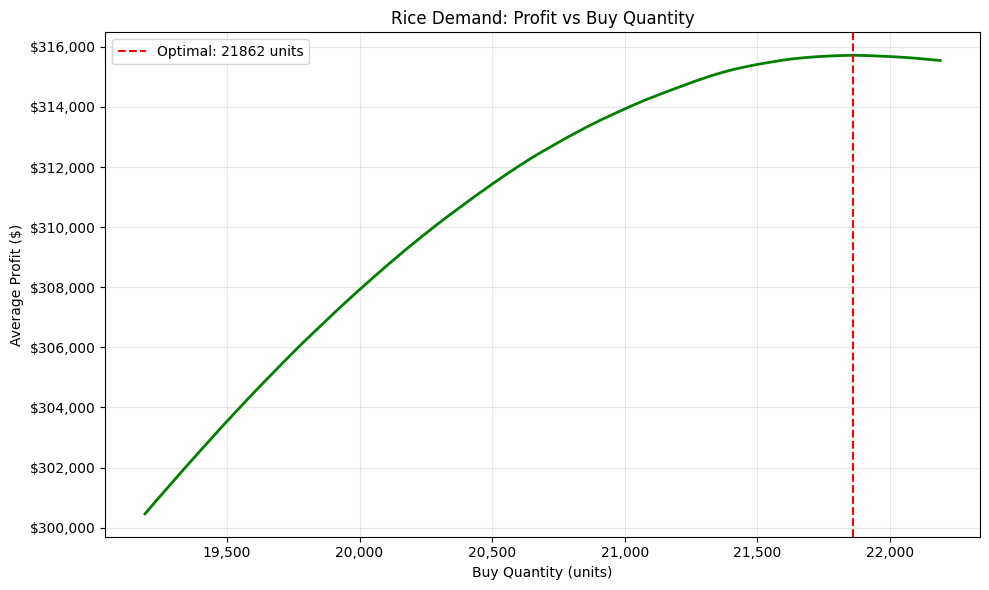


Optimal buy quantity: 21862 units
Expected profit: $315,721.23


In [13]:
# Plot to visualize 
plt.figure(figsize=(10, 6))
plt.plot(df_profit['buy_quantity'], df_profit['average_profit'], 'g-', linewidth=2)
plt.axvline(optimal_row['buy_quantity'], color='red', linestyle='--', 
            label=f'Optimal: {optimal_row["buy_quantity"]:.0f} units')

plt.xlabel('Buy Quantity (units)')
plt.ylabel('Average Profit ($)')
plt.title('Rice Demand: Profit vs Buy Quantity')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

print(f"\nOptimal buy quantity: {optimal_row['buy_quantity']:.0f} units")
print(f"Expected profit: ${optimal_row['average_profit']:,.2f}")
